# Lagrangian particle tracking

Materials and particles that tend to follow ocean currents can be analyzed in terms of trajectories. These are simply computed by integrating velocities over time within a [Lagrangian framework](https://en.wikipedia.org/wiki/Lagrangian_and_Eulerian_specification_of_the_flow_field). 

In `Julia` this is easily done e.g. using the [IndividualDisplacements.jl](https://JuliaClimate.github.io/IndividualDisplacements.jl/dev/) package.

## 1. Software, Grid, And Velocities

In [1]:
using IndividualDisplacements, DataFrames, Statistics
pth=dirname(pathof(IndividualDisplacements))
include(joinpath(pth,"../examples/helper_functions.jl"))
import Base: map
include(joinpath(pth,"../examples/recipes_plots.jl"))

┌ Info: Precompiling IndividualDisplacements [b92f0c32-5b7e-11e9-1d7b-238b2da8b0e6]
└ @ Base loading.jl:1278


Base.map

In [2]:
IndividualDisplacements.get_ecco_velocity_if_needed() #download data if needed

𝑃,𝐷=global_ocean_circulation(k=20,ny=2) #grid etc
ODL=OceanDepthLog(𝐷.Γ) #used for plotting later

fieldnames(typeof(𝑃)) #FlowFields data structure

(:u0, :u1, :v0, :v1, :𝑇, :update_location!)

## 2. Initialize Individuals

In [3]:
𝐷.🔄(𝑃,𝐷,0.0) #update velocity fields (here, to Dec and Jan bracketing t=0.0)

np=100
xy = init_global_randn(np,𝐷)
df=DataFrame(x=xy[1,:],y=xy[2,:],f=xy[3,:]) #initial positions

𝐼=Individuals(𝑃,df.x[1:np],df.y[1:np],df.f[1:np]) #Individuals data structure

fieldnames(typeof(𝐼))

(:📌, :🔴, :🆔, :🚄, :∫, :🔧, :𝑃, :𝐷, :𝑀)

## 3. Compute Trajectories

In [4]:
𝑇=(0.0,𝐼.𝑃.𝑇[2]) #first half of January
∫!(𝐼,𝑇) #mid-Dec to mid-Jan

for m=1:12
    𝐷.🔄(𝑃,𝐷,0.0) #update velocity fields
    ∫!(𝐼) #integrate forward by one more month
end

## 4. Post-Processing

In [5]:
add_lonlat!(𝐼.🔴,𝐷.XC,𝐷.YC)
𝐼.🔴[end-3:end,:]

,ID,x,y,fid,t,lon,lat
,Int64,Float64,Float64,Int64,Float64,Float64,Float64
1,97,182.392,47.5798,5,1.314e6,-80.4202,-58.2655
2,98,125.538,27.6651,5,1.314e6,-100.335,-15.3776
3,99,59.8788,139.806,2,1.314e6,111.879,-19.8357
4,100,60.4401,146.79,2,1.314e6,112.44,-13.1139


## 5. Plot Trajectories

In this example we simply map out individual positions (red to yellow) over a map of ocean depth (log10).

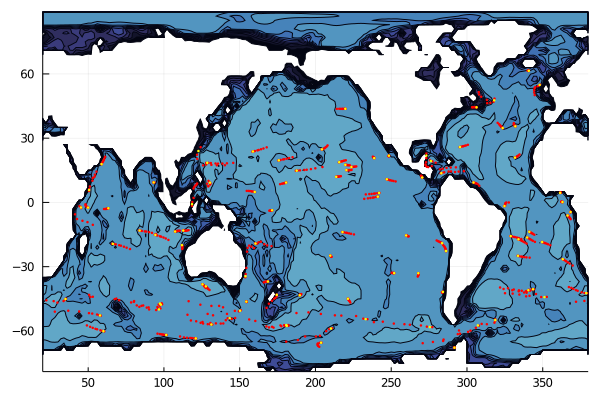

In [6]:
map(𝐼,ODL)